In [1]:
# Import data
import pandas as pd
import data_work
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
df = data_work.load_data()


In [3]:
df = data_work.clean_values(df)


In [4]:
df = data_work.summary_calculations(df)


In [5]:
df_detail = data_work.detail_calculations(df)


In [6]:
df_detail.tail()

,customer_id,contract_id,deposit,amt_due,company,sector,industry,email,address,city,state,zip
due_date,,,,,,,,,,,,
2021-09-14,4,378,False,15700.0,Viva,Health Care,Major Pharmaceuticals,wgiovanitti3@nytimes.com,074 Center Place,Topeka,KS,66667
2021-09-14,107,974,False,19900.0,Flashset,Health Care,Medical Specialities,mstummeyer2y@npr.org,236 Weeping Birch Parkway,Dallas,TX,75216
2021-09-25,183,364,False,18600.0,Bubblebox,Finance,Major Banks,kklageman52@about.me,6298 Maryland Center,Erie,PA,16510
2021-09-25,172,43,False,19700.0,Brainsphere,Health Care,Medical/Dental Instruments,sassur4r@bloglovin.com,5881 Ruskin Circle,Portland,OR,97206
2021-10-04,29,509,False,9400.0,Yodoo,NaN,NaN,lwinstanleys@noaa.gov,3 Oneill Court,Tucson,AZ,85715


In [7]:

df_v = df_detail.reset_index()
df_v['year'] = df_v['due_date'].dt.year
df_v['month'] = df_v['due_date'].dt.month

# Top ten states with amount due
The following graph shows the top ten states. Washington and Portland being the top 2 while Pheonix is the least out of the ten.

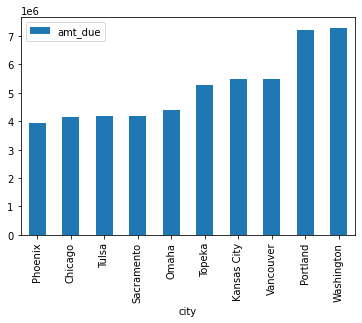

In [8]:
df_detail.groupby('city', as_index=False).agg({'amt_due':'sum'}).sort_values('amt_due')[-10:].plot.bar(y = 'amt_due', x= 'city')

# Total amount due from 1/2019 to 7/2021
The below line chart shows the total amount due increased initally but then had an exponential decline. 

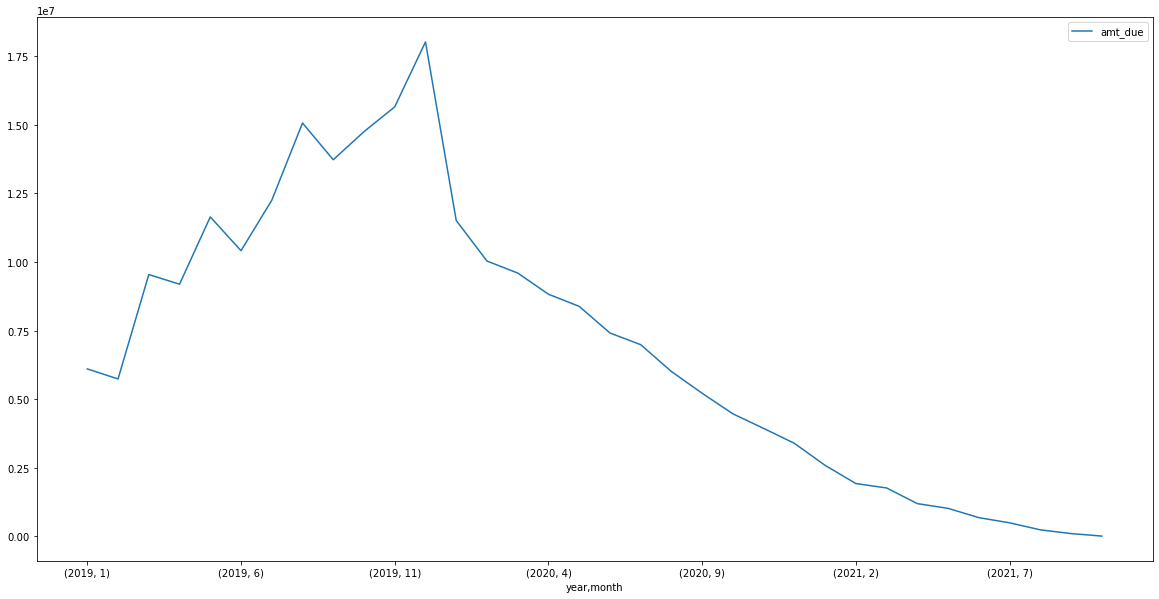

In [11]:
df_v.groupby(['year', 'month']).agg({'amt_due':sum}).plot(figsize=(20,10))